In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score,auc, roc_curve


In [30]:
OUT_DIR = Path(r'C:\Users\HP\Desktop\PYTHON PROJECT FROM DATALABS\appendicitis_plots')
OUT_DIR.mkdir(parents=True, exist_ok=True)

df = pd.read_csv(r'C:\Users\HP\Desktop\PYTHON PROJECT FROM DATALABS\Appendicitis Project Assets\appendicitis_data.csv')
print('Columns (original):', df.columns.tolist())
# Normalize column names to lowercase with underscores to match other notebook conventions
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df = df.loc[:, ~df.columns.str.contains('^unnamed')]
# Fix known misspelled column name to match other notebook conventions
if 'paedriatic_appendicitis_score' in df.columns:
    df = df.rename(columns={'paedriatic_appendicitis_score': 'pediatric_appendicitis_score'})
print('Columns (normalized):', df.columns.tolist())
df.head()


Columns (original): ['Age', 'BMI', 'Sex', 'Height', 'Weight', 'Length_of_Stay', 'Management', 'Severity', 'Diagnosis_Presumptive', 'Diagnosis', 'Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Appendix_on_US', 'Appendix_Diameter', 'Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'Body_Temperature', 'WBC_Count', 'Neutrophil_Percentage', 'Segmented_Neutrophils', 'Neutrophilia', 'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count', 'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine', 'CRP', 'Dysuria', 'Stool', 'Peritonitis', 'Psoas_Sign', 'Ipsilateral_Rebound_Tenderness', 'US_Performed', 'US_Number', 'Free_Fluids', 'Appendix_Wall_Layers', 'Target_Sign', 'Appendicolith', 'Perfusion', 'Perforation', 'Surrounding_Tissue_Reaction', 'Appendicular_Abscess', 'Abscess_Location', 'Pathological_Lymph_Nodes', 'Lymph_Nodes_Location', 'Bowel_Wall_Thickening', 'Conglomerate_of_Bowel_Loops', 'Ileus', 'Coprostasis', 'Meteorism

,age,bmi,sex,height,weight,length_of_stay,management,severity,diagnosis_presumptive,diagnosis,...,abscess_location,pathological_lymph_nodes,lymph_nodes_location,bowel_wall_thickening,conglomerate_of_bowel_loops,ileus,coprostasis,meteorism,enteritis,gynecological_findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


In [26]:
print(df.shape)
df.info()


(782, 69)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Management                        781 non-null    object 
 7   Severity                          781 non-null    object 
 8   Diagnosis_Presumptive             780 non-null    object 
 9   Diagnosis                         780 non-null    object 
 10  Alvarado_Score                    730 non-null    float64
 11  Paedriatic_Appendicitis_Score     730 non-null    float64
 12

In [16]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df = df.loc[:, ~df.columns.str.contains('^unnamed')]
df = df.dropna(subset=['severity'])
df.head()

,age,bmi,sex,height,weight,length_of_stay,management,severity,diagnosis_presumptive,diagnosis,...,abscess_location,pathological_lymph_nodes,lymph_nodes_location,bowel_wall_thickening,conglomerate_of_bowel_loops,ileus,coprostasis,meteorism,enteritis,gynecological_findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


In [17]:
df = df.rename(columns={"paedriatic_appendicitis_score": "pediatric_appendicitis_score"})


In [18]:
import pickle
SAVE_DIR = "C:/Users/HP/Desktop/PYTHON PROJECT FROM DATALABS"   
Path(SAVE_DIR).mkdir(parents=True, exist_ok=True)
df.to_csv(Path(SAVE_DIR) / "appendicitis_clean_v2.csv", index=False)

In [19]:
df.describe(include='all')

,age,bmi,sex,height,weight,length_of_stay,management,severity,diagnosis_presumptive,diagnosis,...,abscess_location,pathological_lymph_nodes,lymph_nodes_location,bowel_wall_thickening,conglomerate_of_bowel_loops,ileus,coprostasis,meteorism,enteritis,gynecological_findings
count,781.000000,755.000000,780,756.000000,779.000000,778.000000,781,781,780,780,...,13,203,121,99,43,60,71,140,66,26
unique,NaN,NaN,2,NaN,NaN,NaN,4,2,16,2,...,7,2,26,2,2,2,2,2,2,14
top,NaN,NaN,male,NaN,NaN,NaN,conservative,uncomplicated,appendicitis,appendicitis,...,Douglas,yes,mesenterial,yes,no,no,yes,yes,yes,keine
freq,NaN,NaN,403,NaN,NaN,NaN,483,662,682,463,...,6,154,37,55,22,37,46,129,51,9
mean,11.346451,18.907012,NaN,148.017460,43.172542,4.284062,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.529909,4.385331,NaN,19.732016,17.390984,2.574057,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,7.830000,NaN,53.000000,3.960000,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.200000,15.725000,NaN,137.000000,29.500000,3.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,11.440000,18.060000,NaN,149.650000,41.400000,3.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,14.100000,21.180000,NaN,163.000000,54.000000,5.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
sex_encoder = LabelEncoder()
df['sex_encoded'] = sex_encoder.fit_transform(df['sex'])
joblib.dump(sex_encoder, 'sex_encoder.pkl')
    
# Severity (Target) Encoder
severity_encoder = LabelEncoder()
df['severity_encoded'] = severity_encoder.fit_transform(df['severity'])
joblib.dump(severity_encoder, 'severity_encoder.pkl')

features = ['age', 'sex_encoded', 'wbc_count', 'crp', 'appendix_on_us', 'neutrophil_percentage', 'alvarado_score', 'pediatric_appendicitis_score']
X = df[features].copy()
y = df['severity_encoded']

# Encode categorical if needed
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# list of feature columns that must be non-missing
required_features = ['age', 'sex_encoded', 'wbc_count', 'crp', 'appendix_on_us', 'neutrophil_percentage', 'alvarado_score', 'pediatric_appendicitis_score']

# If you also need the target to be present, include it too:
# required = required_features + ['severity']
required = required_features

# show how many rows will be dropped
before = len(df)
df = df.dropna(subset=required)
after = len(df)
print(f'Dropped {before-after} rows with NaN in {required}')



# then continue to define X, y, and split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# required feature list
required_features = ['age', 'sex_encoded', 'wbc_count', 'crp', 'appendix_on_us', 'neutrophil_percentage', 'alvarado_score', 'pediatric_appendicitis_score']

# For TRAIN
mask_tr = X_train[required_features].notna().all(axis=1)
X_train = X_train.loc[mask_tr]
# y_train is a numpy array (LabelEncoder produced an array). Index it with the boolean mask values
y_train = y_train[mask_tr.values]

# For TEST
mask_te = X_test[required_features].notna().all(axis=1)
X_test = X_test.loc[mask_te]
# y_test is a numpy array; use the boolean mask values to index it
y_test = y_test[mask_te.values]

print('Train shape after dropping:', X_train.shape)
print('Test shape after dropping:', X_test.shape)

Dropped 110 rows with NaN in ['age', 'sex_encoded', 'wbc_count', 'crp', 'appendix_on_us', 'neutrophil_percentage', 'alvarado_score', 'pediatric_appendicitis_score']
Train shape after dropping: (531, 8)
Test shape after dropping: (141, 8)


Saved scaler.pkl
===== Logistic Regression =====
===== Random Forest =====
===== KNN =====
Saved knn_model.pkl
===== Gradient Boosting =====
===== KNN =====
Saved knn_model.pkl
===== Gradient Boosting =====
{'Logistic Regression': {'accuracy': 0.8581560283687943, 'precision': 0.8984375, 'recall': 0.9426229508196722, 'f1': 0.92, 'report': '              precision    recall  f1-score   support\n\n           0       0.46      0.32      0.38        19\n           1       0.90      0.94      0.92       122\n\n    accuracy                           0.86       141\n   macro avg       0.68      0.63      0.65       141\nweighted avg       0.84      0.86      0.85       141\n'}, 'Random Forest': {'accuracy': 0.8723404255319149, 'precision': 0.9126984126984127, 'recall': 0.9426229508196722, 'f1': 0.9274193548387096, 'report': '              precision    recall  f1-score   support\n\n           0       0.53      0.42      0.47        19\n           1       0.91      0.94      0.93       122\n\n  

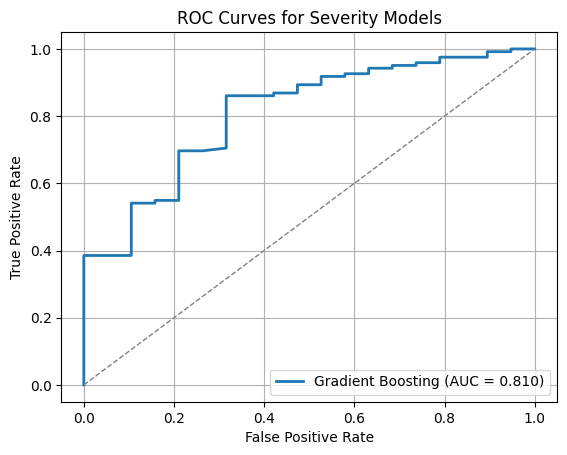

In [37]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Save the fitted scaler so inference code can reuse the same transformation
joblib.dump(scaler, 'scaler.pkl')
print('Saved scaler.pkl')

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    print(f"===== {name} =====")
    # Use scaled data for models that require scaling
    if name in ["Logistic Regression", "KNN"]:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

    # Save the trained KNN model to file when the loop is processing the KNN entry
    if name == "KNN":
        try:
            joblib.dump(model, 'knn_model.pkl')
            print('Saved knn_model.pkl')
        except Exception as e:
            print(f'Failed to save knn_model.pkl: {e}')

    results[name] = {
        "accuracy": accuracy_score(y_test, preds),
        "precision": precision_score(y_test, preds, zero_division=0),
        "recall": recall_score(y_test, preds, zero_division=0),
        "f1": f1_score(y_test, preds, zero_division=0),
        "report": classification_report(y_test, preds)      
    }

print(results)
# Plot ROC Curves for all models
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

# Plot chance line
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

plt.title('ROC Curves for Severity Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
f = OUT_DIR / 'roc_curve_2.png'
plt.savefig(f)
plt.show(f)



In [38]:
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
import numpy as np
from pathlib import Path


MODEL_PATH = Path('knn_model.pkl')
SEX_ENCODER_PATH = Path('sex_encoder.pkl')
SEVERITY_ENCODER_PATH = Path('severity_encoder.pkl')


# --- Helper Functions ---
@st.cache_resource
def load_assets():
    """Loads the trained model and encoders, caching them for efficiency."""
    try:
        model = joblib.load(MODEL_PATH)
        sex_encoder = joblib.load(SEX_ENCODER_PATH)
        severity_encoder = joblib.load(SEVERITY_ENCODER_PATH)
        return model, sex_encoder, severity_encoder
    except FileNotFoundError as e:
        st.error(f"Error loading required files: {e.filename} not found.")
        st.info("Please run `model_trainer.py` first to generate the model files.")
        st.stop()
    except Exception as e:
        st.error(f"An unexpected error occurred during asset loading: {e}")
        st.stop()

# --- Main Application Logic ---

def main():
    st.set_page_config(
        page_title="Appendicitis Severity Predictor",
        layout="wide",
        initial_sidebar_state="expanded"
    )
    st.title("🏥 Appendicitis Severity Prediction")
    st.markdown("Use this tool to predict the severity of appendicitis (Complicated vs. Uncomplicated) based on key clinical metrics.")

    model, sex_encoder, severity_encoder = load_assets()

    # --- Sidebar for User Input ---
    with st.sidebar:
        st.header("Patient Clinical Data")
        
        # Age input
        age = st.slider("Age (Years)", min_value=1, max_value=120, value=30, step=1)
        
        # Sex input
        sex_options = ['Male', 'Female']
        sex_encoded = st.selectbox("Sex", options=sex_options)
        
        # WBC input (White Blood Cell Count)
        wbc_count = st.number_input("WBC Count (x10⁹/L)", min_value=1.0, max_value=40.0, value=12.0, step=0.1)
        st.caption("Normal range: 4.5–11.0. Higher values suggest inflammation.")

        # CRP input (C-Reactive Protein)
        crp = st.number_input("CRP Level (mg/L)", min_value=0.1, max_value=100.0, value=15.0, step=0.1)
        st.caption("Inflammatory marker. Higher values (e.g., >20 mg/L) may indicate perforation/complication.")

        # appendix_on_us (Appendix on Ultrasound)
        appendix_on_us_options = ['Yes','No']
        appendix_on_us = st.selectbox("Appendix on Ultrasound", options=appendix_on_us_options)

        # Neutrophil Percentage input
        neutrophil_percentage = st.number_input("Neutrophil Percentage (%)", min_value=10.0, max_value=99.0, value=75.0, step=0.1)
        st.caption("Percentage of WBCs that are neutrophils. High values (e.g., >75%) are often seen in appendicitis.")

        # alvarado_score (Alvarado Score)
        alvarado_score = st.number_input("Alvarado Score", min_value=1.0, max_value=10.0, value=2.0, step=1.0)
        st.caption("Alvarado Score of >=7, suggests a higher probability of appendicits")
        
        # pediatric_appendicitis_score (Pediatric Appendicitis Score)
        pediatric_appendicitis_score = st.number_input("Pediatric Appendicitis Score", min_value=1.0, max_value=10.0, value=2.0, step=1.0)
        st.caption("Pediatric Appendicitis Score >=6, suggests a higher probability of appendicitis")

        predict_button = st.button("Predict Severity", type="primary")

    # --- Prediction & Results Display ---
    st.subheader("Prediction Results")
    
    if predict_button:
        # 1. Prepare Data for Prediction
        # Encode Gender input
        sex_encoded = sex_encoder.transform([sex])[0]
        
        # Create a DataFrame from inputs
        input_data = pd.DataFrame({
            'Age': [age],
            'Sex_Encoded': [sex_encoded],
            'WBC': [wbc_count],
            'CRP': [crp],
            'Neutrophil_Percentage': [neutrophil_percentage],
            'Alvarado_Score': [alvarado_score],
            'Pediatric_Appendicitis_Score': [pediatric_appendicitis_score],
        })
        
        if "sex" in input_data.columns:
            input_data["sex_encoded"] = input_data["sex"].astype("category").cat.codes
            input_data = input_data.drop(columns=["sex"])
        # 2. Make Prediction
        # Predict the encoded class (0 or 1)
        prediction_encoded = model.predict(input_data)[0]
        
        # Get prediction probability for both classes
        prediction_proba = model.predict_proba(input_data)[0]
        
        # 3. Decode Result
        predicted_severity = severity_encoder.inverse_transform([prediction_encoded])[0]

        # 4. Display Results
        st.markdown(f"**Predicted Severity:**")
        
        if predicted_severity == 'Complicated':
            st.success(f"## {predicted_severity} Appendicitis")
            st.warning("Prediction suggests a Complicated case (e.g., perforation). Immediate surgical consultation is critical.")
        else:
            st.info(f"## {predicted_severity} Appendicitis")
            st.success("Prediction suggests an Uncomplicated case. Continue with standard clinical protocol.")

        st.divider()

        # Display probability breakdown for transparency
        st.markdown("### Model Confidence (Probabilities)")
        
        # Map probabilities back to original labels
        proba_df = pd.DataFrame({
            'Severity': severity_encoder.classes_,
            'Probability': prediction_proba
        }).sort_values(by='Probability', ascending=False)
        prediction_proba = prediction_proba.flatten()

        
        # Format percentages
        proba_df['Probability'] = proba_df['Probability'].apply(lambda x: f"{x * 100:.1f}%")

        st.dataframe(proba_df, use_container_width=True, hide_index=True)


if __name__ == "__main__":
    main()

2025-12-02 17:41:48.469 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-02 17:41:48.528 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-02 17:41:48.533 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-02 17:41:48.543 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-02 17:41:48.552 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-02 17:41:48.554 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-02 17:41:48.560 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-02 17:41:48.528 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar